In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        # Initialize PCA object with the number of components to retain
        self.n_components = n_components
        self.components = None  # Placeholder for principal components
        self.mean = None  # Placeholder for mean of the data

    def fit(self, X):
        # Center the data by subtracting the mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Sorting the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Center the data
        X = X - self.mean

        # Project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed


In [2]:
# Importing necessary modules
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from sklearn.datasets import load_wine, load_iris  # Importing load_wine and load_iris functions from sklearn.datasets

# Loading the wine dataset
wine_data = load_wine()  # Loading the wine dataset using load_wine function

# Assigning features and target variable
X, y = wine_data['data'], wine_data['target']  # Assigning the features to X and the target variable to y

# Printing the shape of the loaded data
print(X.shape)  # Printing the shape of the feature matrix X
print(y.shape)  # Printing the shape of the target vector y


(178, 13)
(178,)


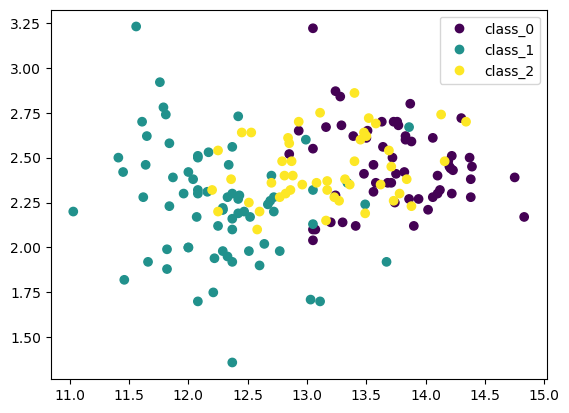

In [3]:
# Creating a scatter plot
plot = plt.scatter(X[:, 0], X[:, 2], c=y)  # Creating a scatter plot using the first and third features of the dataset
# Adding legend
plt.legend(handles=plot.legend_elements()[0],  # Getting legend handles for the scatter plot
           labels=list(wine_data['target_names']))  # Setting legend labels as the target names of the wine dataset
# Displaying the plot
plt.show()  # Showing the scatter plot with the legend


In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
# Creating a PCA object with 2 components
pca = PCA(n_components=2)  # Creating a PCA object with 2 principal components

# Fitting the data to the PCA object
pca.fit(X)  # Fitting the wine dataset to the PCA object

# Transforming the data using the PCA object
X_transformed = pca.transform(X)  # Transforming the wine dataset into its principal components

# Printing the shape of the transformed data
print(X_transformed.shape)  # Printing the shape of the transformed dataset


(178, 2)


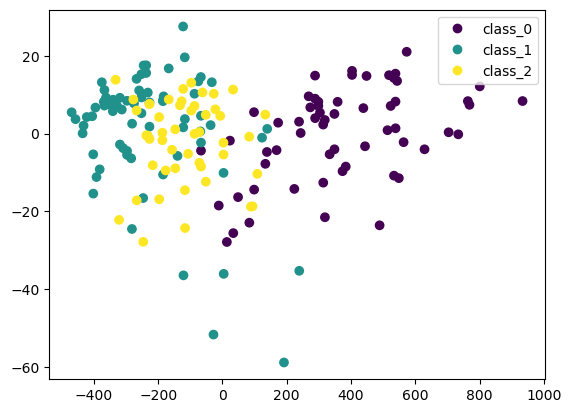

In [6]:
# Importing necessary modules
import matplotlib.pyplot as plt

# Plotting the PCA results
# Creating a scatter plot using the transformed data
plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

# Adding legend to the plot with target names
plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

# Displaying the plot
plt.show()


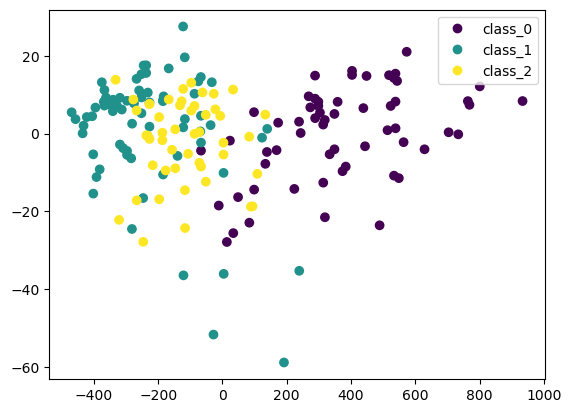

In [7]:
#We observe that class 1 is segregated but there is stiill overlap between class 1 & 2

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Normalizing the Data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply PCA now
pca.fit(X_normalised)

plot=plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()